In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns 
import numpy as np


In [14]:

sns.set_theme(style="white", palette=None)
TRUE_EFFECT = 0.5
df_N300 = pd.read_csv("linear_dgp_noisy_network_N300.csv")
df_N300

,mean,median,std,q005,q025,q975,q995,min,max,type,iter
0,0.495564,0.495602,0.030106,0.420302,0.437499,0.554226,0.572207,0.363781,0.622929,oracle,0
1,0.203294,0.203368,0.029827,0.126688,0.145011,0.261152,0.279012,0.081530,0.333341,observed,0
2,0.223034,0.223182,0.052184,0.086760,0.120133,0.324615,0.355869,-0.035377,0.479296,cut-2S,0
3,0.226162,0.223084,0.065997,0.074932,0.106521,0.362305,0.406097,-0.018941,0.571187,cut-3S,0
4,0.528034,0.527618,0.059028,0.375268,0.411538,0.643110,0.676362,0.309904,0.815184,plugin,0
...,...,...,...,...,...,...,...,...,...,...,...
915,0.534540,0.534762,0.028958,0.461374,0.477607,0.590293,0.609102,0.421669,0.642709,oracle,183
916,0.204435,0.204037,0.031024,0.125967,0.143801,0.265411,0.284639,0.073948,0.329499,observed,183
917,0.214898,0.215301,0.054677,0.071709,0.106895,0.320800,0.353998,-0.043337,0.464274,cut-2S,183
918,0.214499,0.211000,0.065927,0.061972,0.095006,0.352127,0.397778,-0.072314,0.539541,cut-3S,183


In [25]:
df_N300["RMSE"] = np.square(df_N300["mean"]-TRUE_EFFECT) + np.square(df_N300["std"])
df_N300["true_included95"] = (df_N300["q025"] <= TRUE_EFFECT) & (df_N300["q975"] >= TRUE_EFFECT) 
df_N300["true_included99"] = (df_N300["q005"] <= TRUE_EFFECT) & (df_N300["q995"] >= TRUE_EFFECT) 
df_N300['bias'] = df_N300['mean'] - TRUE_EFFECT
df_N300["CI_length95"] = df_N300["q975"] - df_N300["q025"] 
df_N300["CI_length99"] = df_N300["q995"] - df_N300["q005"] 


In [26]:
df_N300.groupby("type").agg({'mean' : ['mean'],
                             'median' : ['median'],
                             'std' : ['mean'],
                             'bias' : ['mean'],
                             'RMSE' : ['mean'],
                             'q025' : ['median'],
                             'q975' : ['median'],
                             'min' : ['median'],
                             'max' : ['median'],
                             'true_included95' : ['mean'],
                             'true_included99' : ['mean']})

,mean,median,std,bias,RMSE,q025,q975,min,max,true_included95,true_included99
,mean,median,mean,mean,mean,median,median,median,median,mean,mean
type,,,,,,,,,,,
cut-2S,0.242925,0.242867,0.046139,-0.257075,0.069244,0.153624,0.330628,0.021262,0.464009,0.000000,0.000000
cut-3S,0.243236,0.240117,0.060357,-0.256764,0.070604,0.136655,0.365642,0.010297,0.553451,0.000000,0.021739
observed,0.224866,0.224846,0.029476,-0.275134,0.077535,0.168138,0.281794,0.110992,0.338877,0.000000,0.000000
oracle,0.501703,0.503036,0.027738,0.001703,0.001634,0.449827,0.555569,0.391278,0.608031,0.951087,0.978261
plugin,0.484941,0.477013,0.048589,-0.015059,0.006005,0.384461,0.569098,0.293315,0.665221,0.902174,0.967391


In [27]:
np.std(df_N300[df_N300['type'] =="plugin"]['mean'])

0.05808618836046941

Text(0.5, 1.0, 'RMSE distribution')

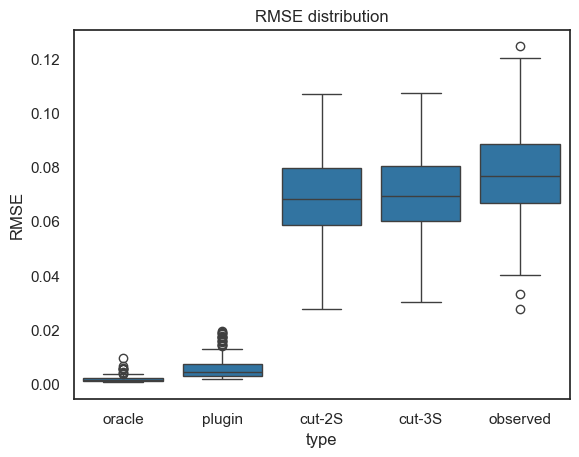

In [39]:
box_rmse = sns.boxplot(data=df_N300, x = 'type', y = 'RMSE',
               order = ['oracle', 'plugin','cut-2S','cut-3S','observed'])
box_rmse.set_title("RMSE distribution")

Text(0.5, 1.0, 'bias distribution')

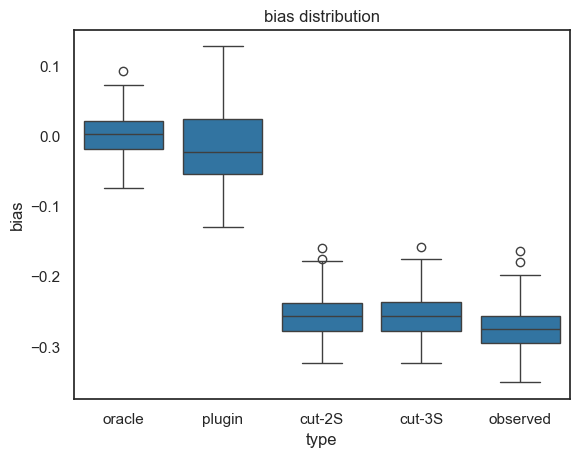

In [40]:
box_bias = sns.boxplot(data=df_N300, x = 'type', y = 'bias',
               order = ['oracle', 'plugin','cut-2S','cut-3S','observed'])
box_bias.set_title("bias distribution")

Text(0.5, 1.0, 'Std distribution')

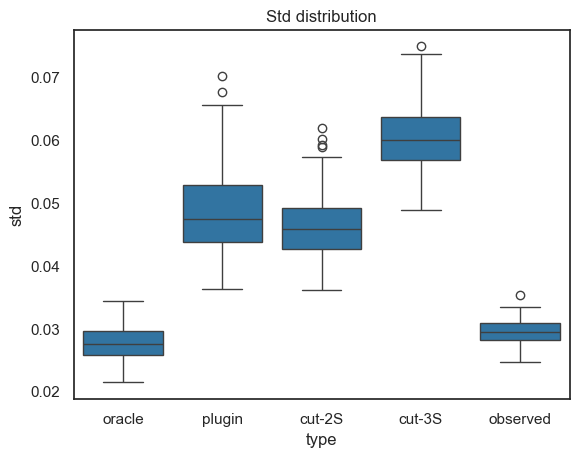

In [41]:
box_std = sns.boxplot(data=df_N300, x = 'type', y = 'std',
               order = ['oracle', 'plugin','cut-2S','cut-3S','observed'])
box_std.set_title("Std distribution")

Text(0.5, 1.0, 'Length of 95% CI distribution')

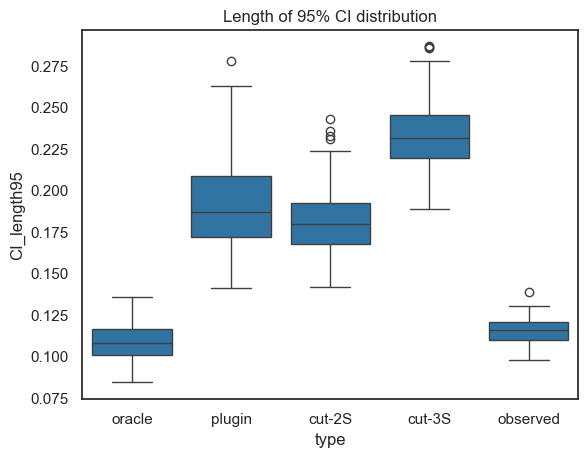

In [42]:
box_ci95 = sns.boxplot(data=df_N300, x = 'type', y = 'CI_length95',
               order = ['oracle', 'plugin','cut-2S','cut-3S','observed'])
box_ci95.set_title("Length of 95% CI distribution")

Text(0.5, 1.0, 'Length of 99% CI distribution')

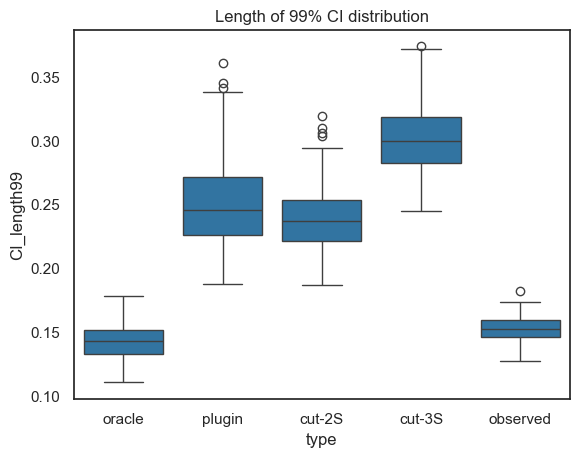

In [43]:
box_ci99 = sns.boxplot(data=df_N300, x = 'type', y = 'CI_length99',
               order = ['oracle', 'plugin','cut-2S','cut-3S','observed'])
box_ci99.set_title("Length of 99% CI distribution")